In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from kf import GibsonSchwartz_KF

### Read data

In [2]:
with open('crudeoil.txt', 'r') as file:
    lines = file.readlines()
z = []
for line in lines:
    numbers = line.split()
    z.append([float(num) for num in numbers])

z=np.array(np.exp(z))
z=pd.DataFrame(z)
start_date = dt.datetime(1990,1,2)
end_date = dt.datetime(1995,2,24)

z.index = pd.date_range(start=start_date, end=end_date, freq='w')

### Plot results function

In [6]:
def plot_res(result):
    palette=["#a6b9f8" ,'#9bd4f2' ,'#66b9e4','#2f9dd7','#0077b6']
    fig, ax1 = plt.subplots(figsize=(8, 3))
    for i in range(5):
        ax1.plot(z.index, z.iloc[:, i], marker='+', markersize=5,
                 linestyle='', color=palette[i], label=fr'$F(t,T_{{{i+1}}})$')
    ax1.plot(z.index, np.exp(result['S_t']), color='green', label=r'$S_t$')
    ax1.set_ylabel('USD$/b')
    ax1.set_title('Crude Oil Futures [wkly]')
    ax1.grid(True, color='gray', linestyle=':')
    ax2 = ax1.twinx()
    ax2.plot(z.index, result['C_t'], color='green', label=r'$C_t$', linestyle=':', alpha=0.5)
    ax2.set_ylabel('Convenience Yield')
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', fontsize=9)

    plt.tight_layout()
    plt.show()

Initial parameters

In [8]:
delta_t = 7 / 365
r = 0.03
p_0_1 = 0.03
p_0_2 = 0.001
p_0_12 = 0.00
c_0 = 0.14
c_R = 0.01

correlation_matrix = np.corrcoef(np.log(z), rowvar=False)
maturities = [1/12, 5/12, 9/12, 13/12, 17/12]

P_0 = np.array([
    [p_0_1, p_0_12],
    [p_0_12, p_0_2]
])
x_0 = np.array([3.2, c_0])

Define my personal class

In [9]:
kf = GibsonSchwartz_KF()

### Manually set parameters


 Manually set parameters
k: 2.844000
a: -0.048000
mu: 0.350000
l: 0.098000
s_s: 0.229000
s_c: 0.095000
rho: -0.981000


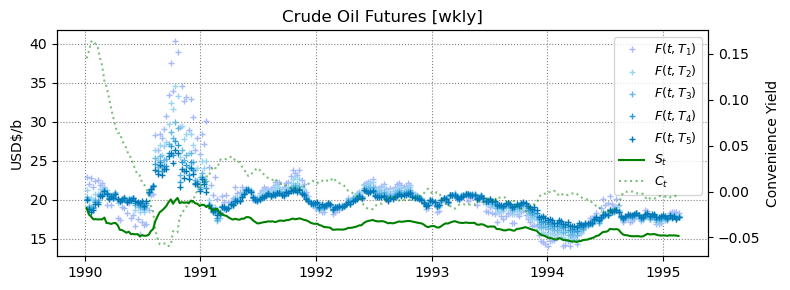

In [ ]:
manual_params = [2.844, -0.048, 0.350, 0.098, 0.229, 0.095, -0.981]

result_df = kf.Fit_Run(
    z_df=np.log(z),
    dt=delta_t,
    x_0=x_0,
    P_0=P_0,
    maturities=maturities,
    R=c_R * correlation_matrix,
    bounds=None,
    manual_params=manual_params,
    r=r,
    verbose=True
)
plot_res(result_df)

### Random grid search parameters


Best Parameters (Random Grid Search):
k: 1.681110
a: -0.045948
mu: -0.311119
l: 0.093362
s_s: 0.339453
s_c: 0.011599
rho: 0.460582
Best log-likelihood: -5685.527718


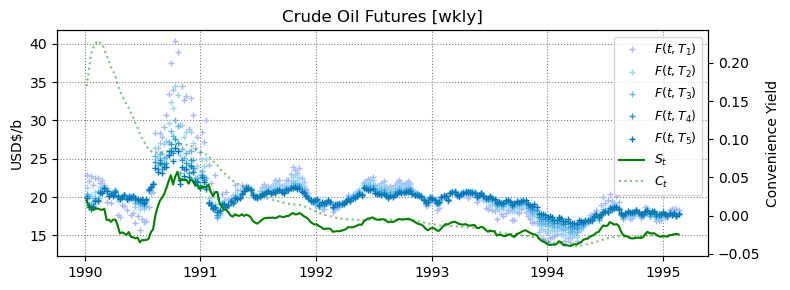

In [13]:
bounds = [
    (1, 10),       # k
    (-0.05, 0.05), # alpha
    (-0.4, 0.4),   # mu
    (-0.1, 0.1),   # lambda
    (0.01, 0.4),   # Sigma_s
    (0.001, 0.1),  # Sigma_c
    (-1, 1)        # rho
]
result_df_gridSearch = kf.Fit_Run(
    z_df=np.log(z),
    dt=delta_t,
    x_0=x_0,
    P_0=P_0,
    maturities=maturities,
    R=c_R * correlation_matrix,
    bounds=bounds,
    n_trials=5000,
    manual_params=None,
    r=r,
    verbose=True
)
plot_res(result_df_gridSearch)